<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/synth%20ver%201.1/out-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [33]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [34]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [35]:
dfgurl =  "out-good.csv"
dfmurl =  "out-mal.csv"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl, nrows=30146)

Characteristics of Dataset

In [36]:
dfg

,timestamp,outport,inport,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,...,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,flit_index,vnet_vc_index,target
0,11,2,0,1,4,2,5,0,0,31,...,4,164,1,164,164,26896,0,4,10,1
1,15,2,4,1,4,2,5,0,0,31,...,8,163,2,164,326,53464,8,4,10,1
2,19,2,4,1,4,2,5,0,0,31,...,12,162,3,164,486,79704,8,4,10,1
3,22,2,0,1,4,2,6,0,0,31,...,4,161,4,164,644,105616,0,4,12,1
4,23,1,4,1,4,2,5,0,0,31,...,16,160,5,164,800,131200,4,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16498,9918,2,4,4,2,3,10,0,0,31,...,16,5,44,48,220,10560,8,8,30,1
16499,9918,1,3,4,2,3,9,0,0,31,...,23,4,45,48,180,8640,3,8,27,1
16500,9918,1,3,1,4,2,5,0,0,31,...,24,3,46,48,138,6624,3,4,10,1
16501,9918,1,4,5,3,3,9,0,0,31,...,23,2,47,48,94,4512,4,15,27,1


In [37]:
dfm

,timestamp,outport,inport,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,...,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,flit_index,vnet_vc_index,target
0,7,2,0,1,4,2,5,9,9,31,...,4,646,1,646,646,417316,0,4,10,0
1,7,1,0,1,4,2,5,11,11,31,...,4,645,2,646,1290,833340,0,4,10,0
2,8,1,0,1,4,2,6,11,11,31,...,4,644,3,646,1932,1248072,0,4,12,0
3,9,1,0,1,4,2,7,11,11,31,...,4,643,4,646,2572,1661512,0,4,14,0
4,9,2,0,1,1,3,9,9,9,31,...,4,642,5,646,3210,2073660,0,1,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30141,9917,0,0,2,2,3,9,15,15,31,...,9,149,52,200,7748,1549600,0,4,27,0
30142,9917,2,0,1,4,2,7,12,12,31,...,4,148,53,200,7844,1568800,0,4,14,0
30143,9917,2,4,1,4,1,1,12,12,31,...,8,147,54,200,7938,1587600,8,4,1,0
30144,9918,2,0,1,4,2,8,10,10,31,...,377,146,55,200,8030,1606000,0,4,16,0


In [38]:
df = dfm.append(dfg, ignore_index=True,sort=False)

In [39]:
df.isnull().sum()

timestamp                 0
outport                   0
inport                    0
flit_id                   0
flit_type                 0
vnet                      0
vc                        0
src_ni                    0
src_router                0
dst_ni                    0
dst_router                0
router_0                  0
router_1                  0
router_2                  0
router_3                  0
router_4              16503
router_5              16503
router_6              16503
router_7                  0
router_8              16503
router_9              16503
router_10             16503
router_11                 0
router_12             16503
router_13             16503
router_14             16503
router_15                 0
hop_count                 0
current_hop               0
hop_percentage            0
enqueue_time              0
packet_count_decr         0
packet_count_incr         0
max_packet_count          0
packet_count_index        0
packet_max_index    

In [40]:
df = df.fillna(0)

In [41]:
df.isnull().sum()

timestamp             0
outport               0
inport                0
flit_id               0
flit_type             0
vnet                  0
vc                    0
src_ni                0
src_router            0
dst_ni                0
dst_router            0
router_0              0
router_1              0
router_2              0
router_3              0
router_4              0
router_5              0
router_6              0
router_7              0
router_8              0
router_9              0
router_10             0
router_11             0
router_12             0
router_13             0
router_14             0
router_15             0
hop_count             0
current_hop           0
hop_percentage        0
enqueue_time          0
packet_count_decr     0
packet_count_incr     0
max_packet_count      0
packet_count_index    0
packet_max_index      0
port_index            0
flit_index            0
vnet_vc_index         0
target                0
dtype: int64

In [42]:
df = df.sort_values('timestamp')
df.to_csv('out-model.csv',index=False)

In [43]:
df = pd.read_csv("out-model.csv")
df

,timestamp,outport,inport,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,...,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,flit_index,vnet_vc_index,target
0,7,2,0,1,4,2,5,9,9,31,...,4,646,1,646,646,417316,0,4,10,0
1,7,1,0,1,4,2,5,11,11,31,...,4,645,2,646,1290,833340,0,4,10,0
2,8,1,0,1,4,2,6,11,11,31,...,4,644,3,646,1932,1248072,0,4,12,0
3,9,1,0,1,4,2,7,11,11,31,...,4,643,4,646,2572,1661512,0,4,14,0
4,9,2,0,1,1,3,9,9,9,31,...,4,642,5,646,3210,2073660,0,1,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46644,9918,2,0,1,4,2,8,10,10,31,...,377,146,55,200,8030,1606000,0,4,16,0
46645,9918,1,4,5,3,3,9,0,0,31,...,23,2,47,48,94,4512,4,15,27,1
46646,9918,0,3,3,2,3,10,7,7,31,...,620,145,56,200,8120,1624000,0,6,30,0
46647,9918,2,4,4,2,3,10,0,0,31,...,16,5,44,48,220,10560,8,8,30,1


In [44]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router','src_ni','dst_ni','dst_router'])
train_X

,outport,inport,flit_id,flit_type,vnet,vc,router_0,router_1,router_2,router_3,...,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,flit_index,vnet_vc_index
0,2,0,1,4,2,5,0,0,0,0,...,0.000000,4,646,1,646,646,417316,0,4,10
1,1,0,1,4,2,5,0,0,0,0,...,0.000000,4,645,2,646,1290,833340,0,4,10
2,1,0,1,4,2,6,0,0,0,0,...,0.000000,4,644,3,646,1932,1248072,0,4,12
3,1,0,1,4,2,7,0,0,0,0,...,0.000000,4,643,4,646,2572,1661512,0,4,14
4,2,0,1,1,3,9,0,0,0,0,...,0.000000,4,642,5,646,3210,2073660,0,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46644,2,0,1,4,2,8,0,0,0,0,...,0.000000,377,146,55,200,8030,1606000,0,4,16
46645,1,4,5,3,3,9,0,0,0,1,...,0.500000,23,2,47,48,94,4512,4,15,27
46646,0,3,3,2,3,10,0,0,0,0,...,1.000000,620,145,56,200,8120,1624000,0,6,30
46647,2,4,4,2,3,10,0,0,1,0,...,0.333333,16,5,44,48,220,10560,8,8,30


In [45]:
train_X.corr()

,outport,inport,flit_id,flit_type,vnet,vc,router_0,router_1,router_2,router_3,...,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,flit_index,vnet_vc_index
outport,1.000000,-0.110668,0.001530,-0.003192,-0.005233,-0.028475,0.278625,0.307709,0.334957,-0.042007,...,-0.658517,-0.047482,-0.012987,-0.059562,-0.080246,-0.024947,0.008077,0.563022,0.000034,-0.011059
inport,-0.110668,1.000000,-0.002656,0.004710,-0.013716,-0.081169,-0.387935,0.123101,0.154651,0.154567,...,0.626406,0.059334,-0.058646,-0.078657,-0.151843,-0.085755,-0.067156,0.656024,-0.000705,-0.051585
flit_id,0.001530,-0.002656,1.000000,-0.455531,0.659505,0.627918,0.094870,0.063584,0.033394,0.006501,...,-0.030499,0.109109,-0.098803,-0.096748,-0.216246,-0.107212,-0.063682,0.040432,0.897283,0.687613
flit_type,-0.003192,0.004710,-0.455531,1.000000,-0.827704,-0.788531,-0.119140,-0.078883,-0.042182,-0.008172,...,0.039654,-0.116848,0.102154,0.132041,0.258993,0.125711,0.067769,-0.050363,-0.063335,-0.863391
vnet,-0.005233,-0.013716,0.659505,-0.827704,1.000000,0.959475,0.109252,0.066287,0.029507,0.002219,...,-0.039554,0.115227,-0.108643,-0.130389,-0.264339,-0.128855,-0.071114,0.036706,0.372474,0.975173
vc,-0.028475,-0.081169,0.627918,-0.788531,0.959475,1.000000,0.156441,0.038494,-0.006284,-0.020090,...,-0.045646,0.139102,-0.087816,-0.100022,-0.207723,-0.096754,-0.050688,-0.046690,0.354363,0.979264
router_0,0.278625,-0.387935,0.094870,-0.119140,0.109252,0.156441,1.000000,-0.065638,-0.071450,-0.078744,...,-0.304448,-0.058212,-0.070516,-0.107128,-0.196460,-0.120198,-0.083871,-0.212368,0.053513,0.155537
router_1,0.307709,0.123101,0.063584,-0.078883,0.066287,0.038494,-0.065638,1.000000,-0.078908,-0.086963,...,-0.238527,-0.049606,-0.056982,-0.077458,-0.148677,-0.081831,-0.053592,0.341914,0.036422,0.056544
router_2,0.334957,0.154651,0.033394,-0.042182,0.029507,-0.006284,-0.071450,-0.078908,1.000000,-0.094664,...,-0.161458,-0.038874,-0.054374,-0.054492,-0.120389,-0.066677,-0.047577,0.393773,0.018680,0.014114
router_3,-0.042007,0.154567,0.006501,-0.008172,0.002219,-0.020090,-0.078744,-0.086963,-0.094664,1.000000,...,-0.085023,-0.032587,-0.039282,-0.040190,-0.087884,-0.049247,-0.038029,0.068008,0.003643,-0.009777


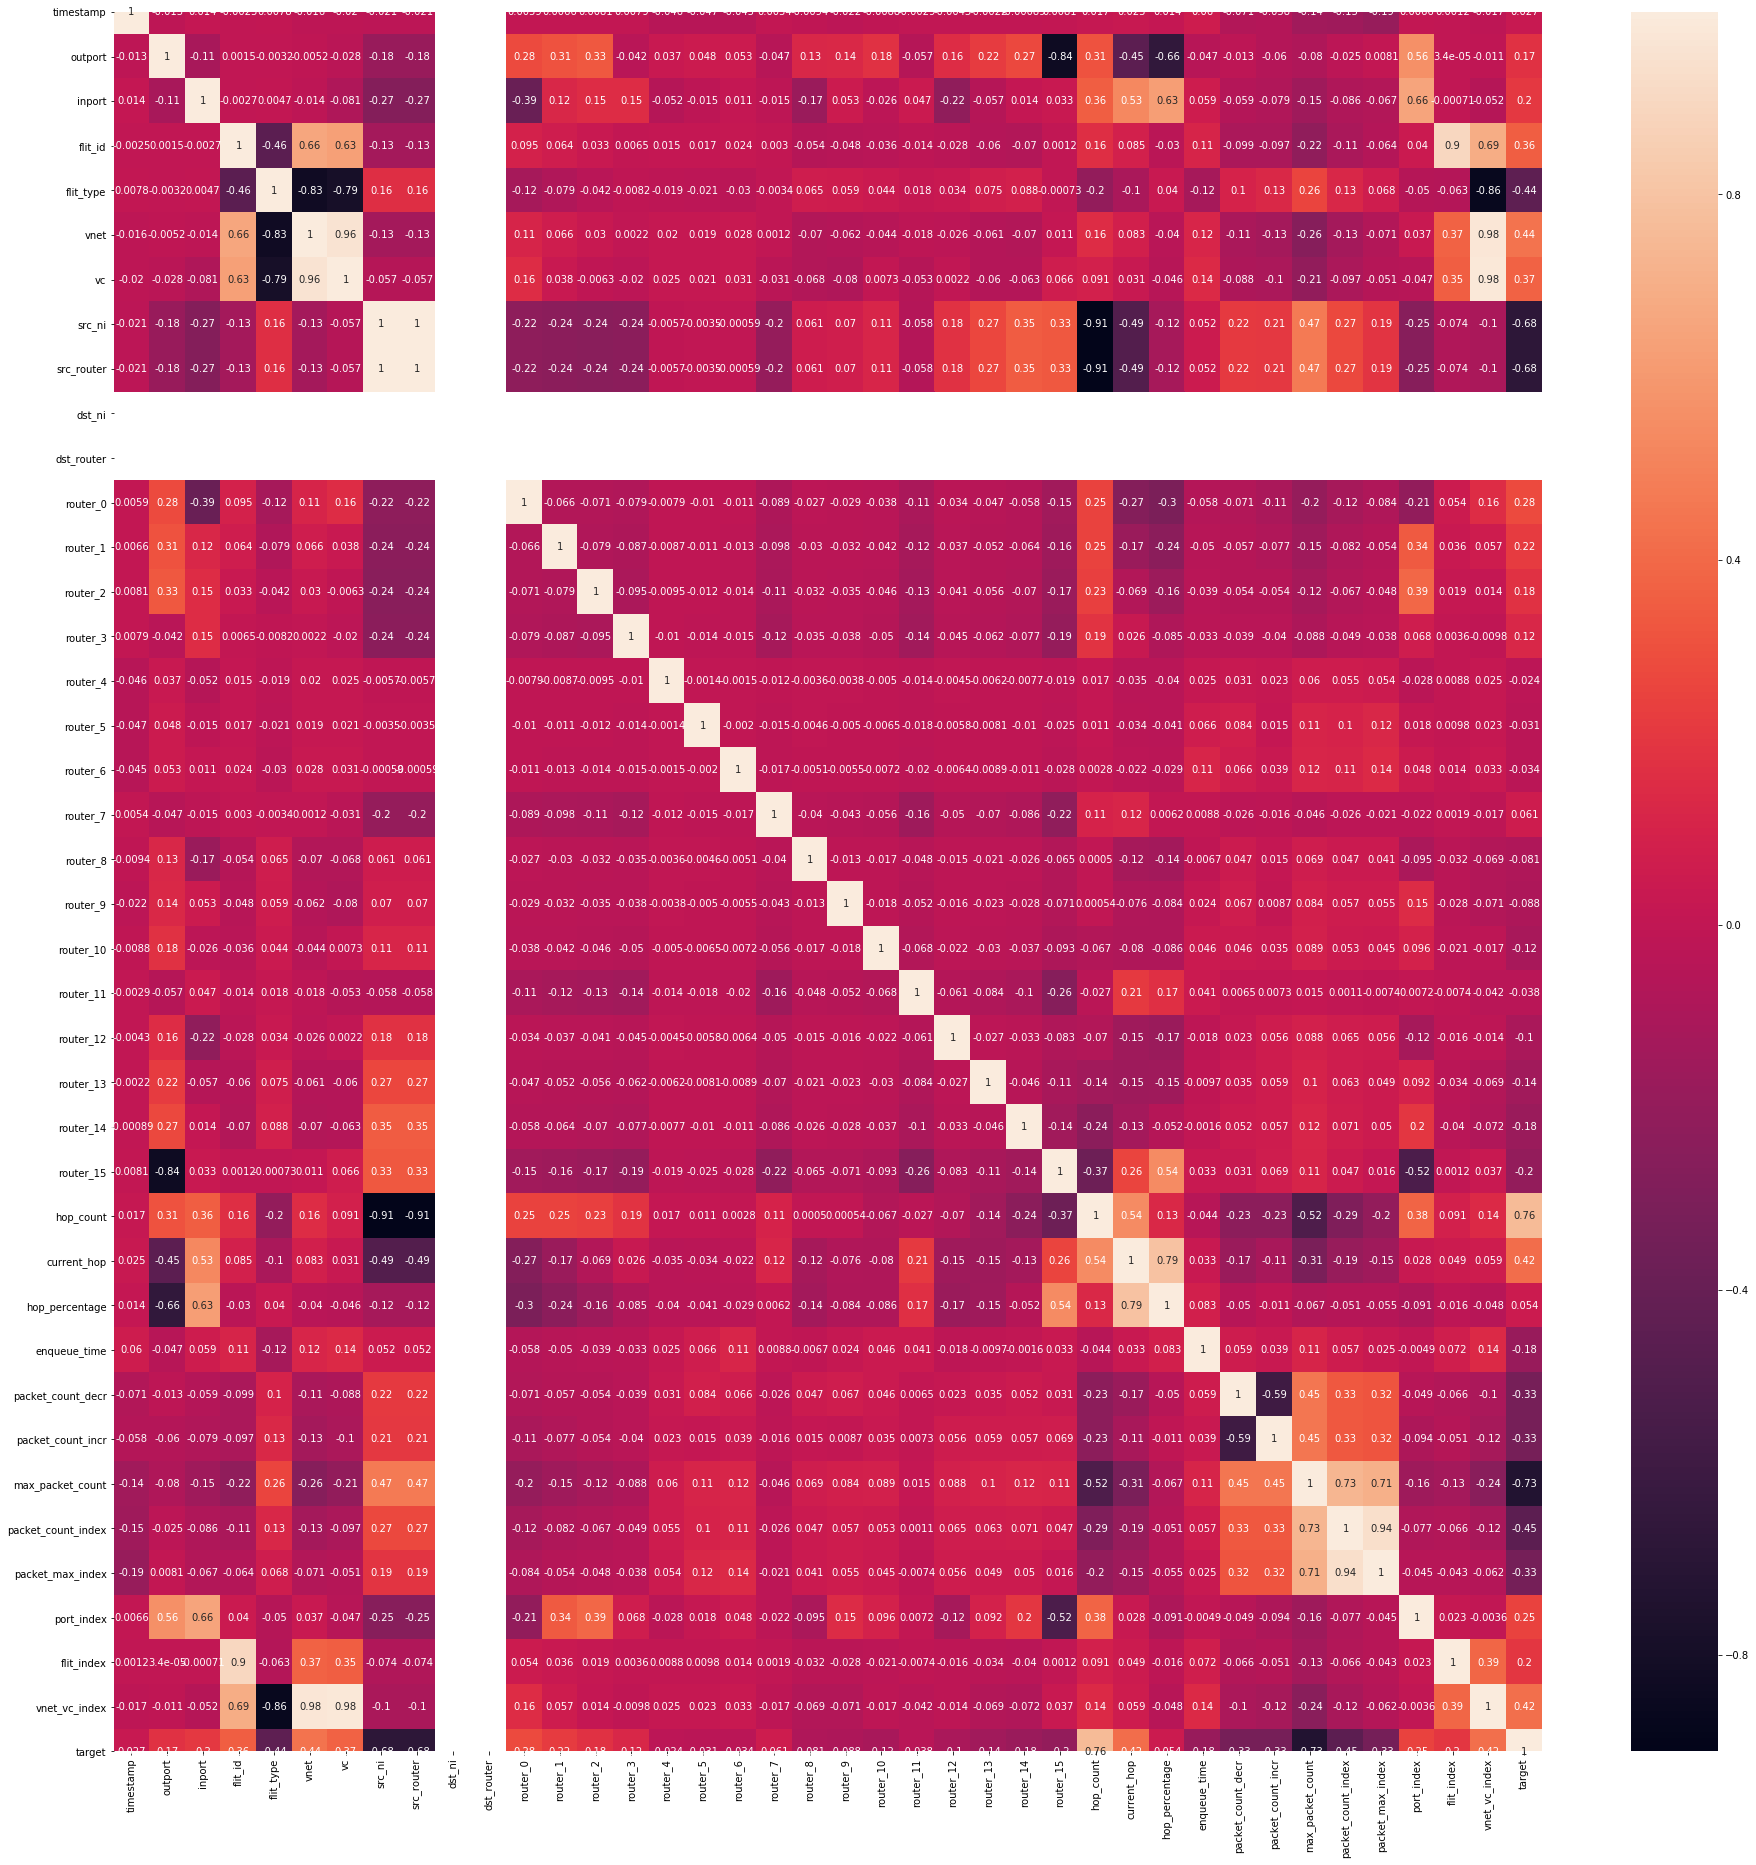

In [46]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [47]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,flit_id,flit_type,vnet,vc,router_0,router_1,router_2,router_3,...,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,flit_index,vnet_vc_index
0,1.0,0.00,0.00,1.000000,0.5,0.363636,0.0,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.005717,0.006139,0.0,0.214286,0.257143
1,0.5,0.00,0.00,1.000000,0.5,0.363636,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.998450,0.001550,1.000000,0.011873,0.012293,0.0,0.214286,0.257143
2,0.5,0.00,0.00,1.000000,0.5,0.454545,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.996899,0.003101,1.000000,0.018011,0.018428,0.0,0.214286,0.314286
3,0.5,0.00,0.00,1.000000,0.5,0.545455,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.995349,0.004651,1.000000,0.024129,0.024543,0.0,0.214286,0.371429
4,1.0,0.00,0.00,0.000000,1.0,0.727273,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.993798,0.006202,1.000000,0.030228,0.030640,0.0,0.000000,0.742857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46644,1.0,0.00,0.00,1.000000,0.5,0.636364,0.0,0.0,0.0,0.0,...,0.000000,0.038943,0.224806,0.083721,0.254181,0.076307,0.023722,0.0,0.214286,0.428571
46645,0.5,1.00,1.00,0.666667,1.0,0.727273,0.0,0.0,0.0,1.0,...,0.500000,0.001984,0.001550,0.071318,0.000000,0.000440,0.000033,0.5,1.000000,0.742857
46646,0.0,0.75,0.50,0.333333,1.0,0.818182,0.0,0.0,0.0,0.0,...,1.000000,0.064314,0.223256,0.085271,0.254181,0.077167,0.023989,0.0,0.357143,0.828571
46647,1.0,1.00,0.75,0.333333,1.0,0.818182,0.0,0.0,1.0,0.0,...,0.333333,0.001253,0.006202,0.066667,0.000000,0.001644,0.000122,1.0,0.500000,0.828571


In [48]:
train_X[train_X.duplicated()].shape

(49, 34)

In [49]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,flit_id,flit_type,vnet,vc,router_0,router_1,router_2,router_3,...,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,flit_index,vnet_vc_index,target
outport,1.000000,-0.110668,0.001530,-0.003192,-0.005233,-0.028475,0.278625,0.307709,0.334957,-0.042007,...,-0.047482,-0.012987,-0.059562,-0.080246,-0.024947,0.008077,0.563022,0.000034,-0.011059,0.174061
inport,-0.110668,1.000000,-0.002656,0.004710,-0.013716,-0.081169,-0.387935,0.123101,0.154651,0.154567,...,0.059334,-0.058646,-0.078657,-0.151843,-0.085755,-0.067156,0.656024,-0.000705,-0.051585,0.204652
flit_id,0.001530,-0.002656,1.000000,-0.455531,0.659505,0.627918,0.094870,0.063584,0.033394,0.006501,...,0.109109,-0.098803,-0.096748,-0.216246,-0.107212,-0.063682,0.040432,0.897283,0.687613,0.356041
flit_type,-0.003192,0.004710,-0.455531,1.000000,-0.827704,-0.788531,-0.119140,-0.078883,-0.042182,-0.008172,...,-0.116848,0.102154,0.132041,0.258993,0.125711,0.067769,-0.050363,-0.063335,-0.863391,-0.443845
vnet,-0.005233,-0.013716,0.659505,-0.827704,1.000000,0.959475,0.109252,0.066287,0.029507,0.002219,...,0.115227,-0.108643,-0.130389,-0.264339,-0.128855,-0.071114,0.036706,0.372474,0.975173,0.440940
vc,-0.028475,-0.081169,0.627918,-0.788531,0.959475,1.000000,0.156441,0.038494,-0.006284,-0.020090,...,0.139102,-0.087816,-0.100022,-0.207723,-0.096754,-0.050688,-0.046690,0.354363,0.979264,0.367861
router_0,0.278625,-0.387935,0.094870,-0.119140,0.109252,0.156441,1.000000,-0.065638,-0.071450,-0.078744,...,-0.058212,-0.070516,-0.107128,-0.196460,-0.120198,-0.083871,-0.212368,0.053513,0.155537,0.280009
router_1,0.307709,0.123101,0.063584,-0.078883,0.066287,0.038494,-0.065638,1.000000,-0.078908,-0.086963,...,-0.049606,-0.056982,-0.077458,-0.148677,-0.081831,-0.053592,0.341914,0.036422,0.056544,0.222804
router_2,0.334957,0.154651,0.033394,-0.042182,0.029507,-0.006284,-0.071450,-0.078908,1.000000,-0.094664,...,-0.038874,-0.054374,-0.054492,-0.120389,-0.066677,-0.047577,0.393773,0.018680,0.014114,0.175348
router_3,-0.042007,0.154567,0.006501,-0.008172,0.002219,-0.020090,-0.078744,-0.086963,-0.094664,1.000000,...,-0.032587,-0.039282,-0.040190,-0.087884,-0.049247,-0.038029,0.068008,0.003643,-0.009777,0.122313


Principal Component Analysis

In [50]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.34689876, -0.60988607,  0.8446661 , ...,  0.73614375,
        -0.50561165, -0.04446093],
       [-0.43342667, -0.25650876,  0.91927505, ...,  0.47185017,
        -0.5243276 , -0.0391278 ],
       [-0.3715927 , -0.24923648,  0.92784322, ...,  0.48458689,
        -0.51282905, -0.01448251],
       ...,
       [ 0.75095387,  1.19630914,  0.15737243, ..., -0.05988091,
        -0.11125985,  0.04145541],
       [ 1.12258848, -0.67658414, -0.67300268, ..., -0.2213993 ,
        -0.04882287,  0.06648118],
       [ 1.1563519 , -0.76984845, -0.51632555, ..., -0.20057207,
        -0.01197718,  0.15724259]])

In [51]:
pca.explained_variance_ratio_

array([0.22962879, 0.2001941 , 0.14974547, 0.06811387, 0.0567514 ,
       0.04430806, 0.04406946, 0.03950917, 0.03002518, 0.02561476,
       0.01651949, 0.01511114, 0.01275134, 0.01245291, 0.01059454])

Text(0, 0.5, 'Variance')

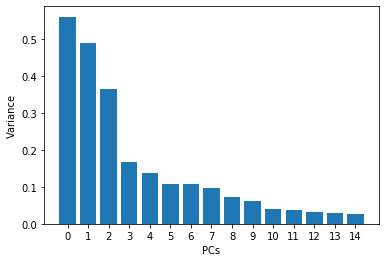

In [52]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [53]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.346899,-0.609886,0.844666,0.008650,0.012266,-0.054025,-0.017646,-0.030415,-0.012523,0.048796,0.157719,0.037452,0.736144,-0.505612,-0.044461
1,-0.433427,-0.256509,0.919275,0.849175,-0.519378,0.030599,0.147054,0.171309,-0.047882,-0.267624,0.003844,-0.165065,0.471850,-0.524328,-0.039128
2,-0.371593,-0.249236,0.927843,0.848189,-0.527637,0.021776,0.157647,0.175642,-0.049490,-0.259748,0.012231,-0.164487,0.484587,-0.512829,-0.014483
3,-0.309758,-0.241964,0.936410,0.847203,-0.535894,0.012952,0.168238,0.179974,-0.051097,-0.251873,0.020616,-0.163912,0.497311,-0.501336,0.010172
4,0.669076,-0.519768,0.902984,0.017155,-0.068466,-0.630226,0.335766,0.034810,-0.032372,0.033465,0.145758,0.067799,0.749158,-0.504103,-0.292323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46644,-0.135891,-0.562774,0.925438,0.002314,-0.052443,-0.068207,0.032722,-0.019958,-0.024221,0.105907,0.107534,0.178730,0.277694,-0.037413,0.908698
46645,1.004719,-0.067407,-0.536945,-0.102188,0.281963,0.542788,-0.789607,0.758096,-0.083047,0.037250,-0.063389,0.000204,-0.214776,-0.050831,0.136379
46646,0.750954,1.196309,0.157372,-0.238859,-0.227768,-0.006287,0.087696,-0.005150,0.002539,0.024012,0.032524,-0.116157,-0.059881,-0.111260,0.041455
46647,1.122588,-0.676584,-0.673003,-0.393445,-0.169720,0.139323,-0.148521,-0.385610,-0.623582,-0.245481,-0.134068,-0.030065,-0.221399,-0.048823,0.066481


In [54]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
0,1.000000e+00,-2.255922e-16,-1.036036e-16,1.476450e-16,3.929015e-16,-6.074750e-16,4.031154e-16,3.944508e-16,-2.000016e-16,-5.375783e-16,6.704828e-17,1.044029e-16,2.476966e-16,-3.799401e-17,-2.326849e-16,0.515953
1,-2.255922e-16,1.000000e+00,-1.921038e-16,-6.204311e-16,-6.388913e-16,-2.857716e-16,-3.479175e-16,-2.385622e-15,-1.578603e-15,4.836708e-15,2.127499e-15,3.674673e-15,3.584585e-15,7.103029e-16,2.139131e-15,-0.131562
2,-1.036036e-16,-1.921038e-16,1.000000e+00,-1.471663e-16,-4.160974e-16,1.929675e-16,1.317479e-16,-1.023389e-16,-2.464445e-16,5.172339e-16,9.145364e-16,-2.215462e-15,-7.567789e-16,4.897182e-16,-1.709412e-16,-0.379622
3,1.476450e-16,-6.204311e-16,-1.471663e-16,1.000000e+00,-5.809580e-16,8.524480e-17,3.409206e-17,-2.275994e-16,-2.625237e-16,8.591097e-16,1.081709e-16,1.486075e-16,-2.022323e-17,4.409641e-17,-1.750055e-16,0.035008
4,3.929015e-16,-6.388913e-16,-4.160974e-16,-5.809580e-16,1.000000e+00,-2.123999e-16,1.545017e-16,7.472755e-16,-6.887900e-17,-3.496821e-16,7.315352e-16,3.471098e-16,4.954745e-16,7.589253e-17,-2.640771e-16,0.388375
5,-6.074750e-16,-2.857716e-16,1.929675e-16,8.524480e-17,-2.123999e-16,1.000000e+00,1.166667e-15,-1.389791e-15,2.432647e-16,-2.988894e-17,2.283326e-16,7.858423e-16,1.254829e-15,-2.033675e-17,7.039013e-16,-0.162909
6,4.031154e-16,-3.479175e-16,1.317479e-16,3.409206e-17,1.545017e-16,1.166667e-15,1.000000e+00,-1.086452e-15,-4.290188e-16,-8.405228e-16,5.559933e-16,7.580045e-16,1.902592e-16,1.968899e-16,8.652210e-17,-0.276522
7,3.944508e-16,-2.385622e-15,-1.023389e-16,-2.275994e-16,7.472755e-16,-1.389791e-15,-1.086452e-15,1.000000e+00,-4.266886e-17,1.132178e-15,3.135291e-16,6.913408e-16,5.365414e-16,8.462120e-17,9.481971e-16,-0.202597
8,-2.000016e-16,-1.578603e-15,-2.464445e-16,-2.625237e-16,-6.887900e-17,2.432647e-16,-4.290188e-16,-4.266886e-17,1.000000e+00,7.650860e-17,2.052202e-16,2.963739e-16,-5.674537e-16,-2.112552e-16,-1.028098e-16,0.063469
9,-5.375783e-16,4.836708e-15,5.172339e-16,8.591097e-16,-3.496821e-16,-2.988894e-17,-8.405228e-16,1.132178e-15,7.650860e-17,1.000000e+00,-8.060833e-16,-8.733825e-16,-6.049441e-16,-2.446604e-17,-5.078476e-16,-0.013885


In [55]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

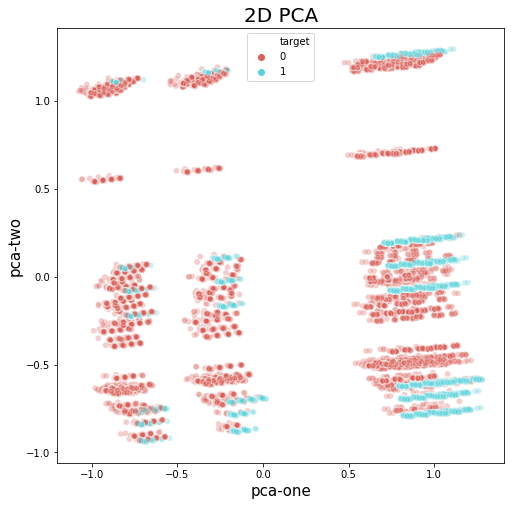

In [56]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

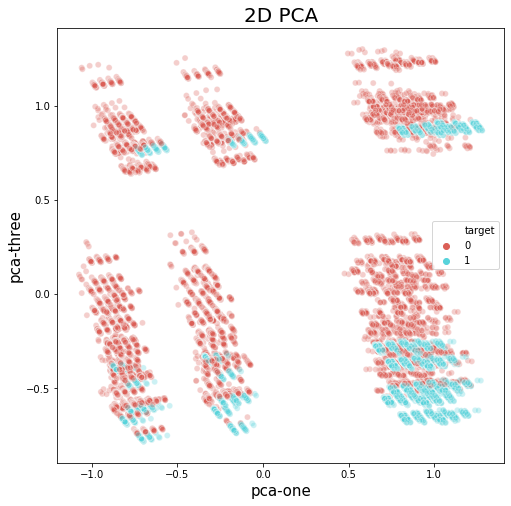

In [57]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

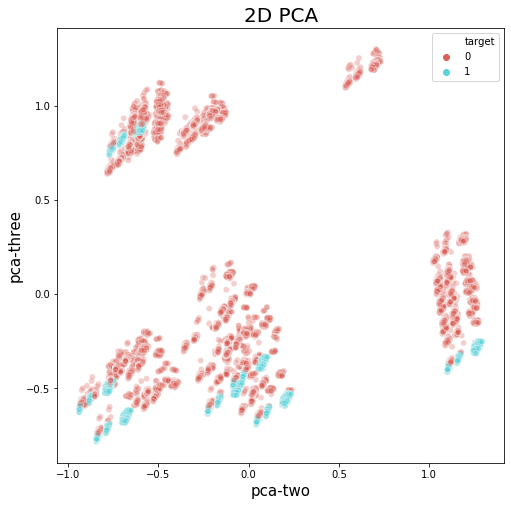

In [58]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

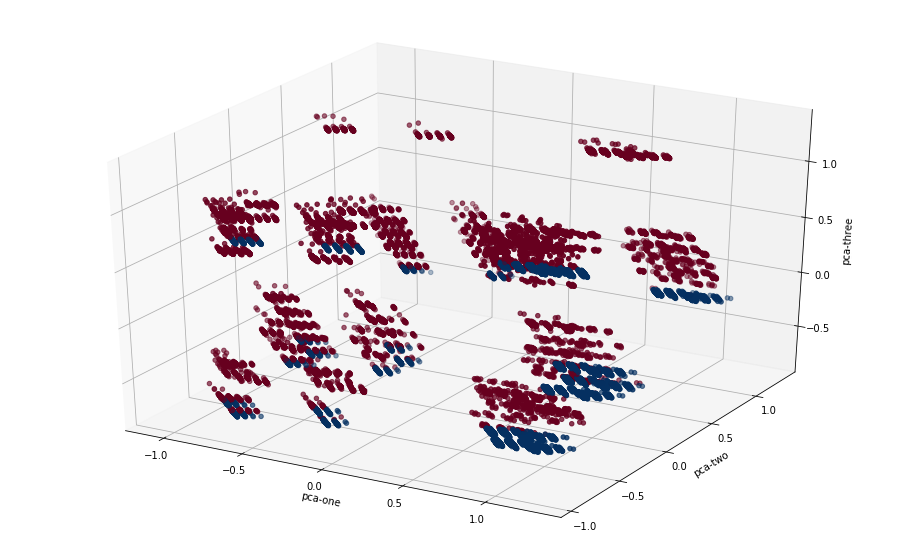

In [59]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

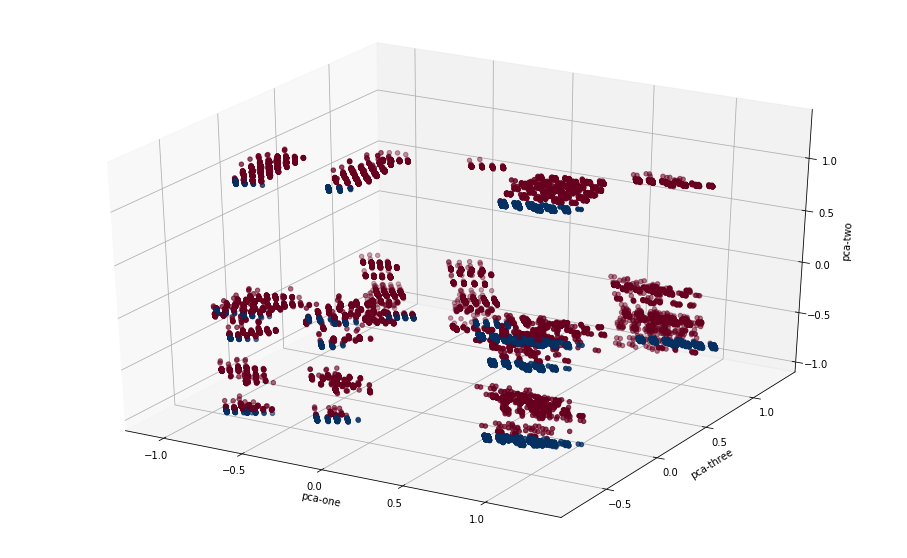

In [60]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

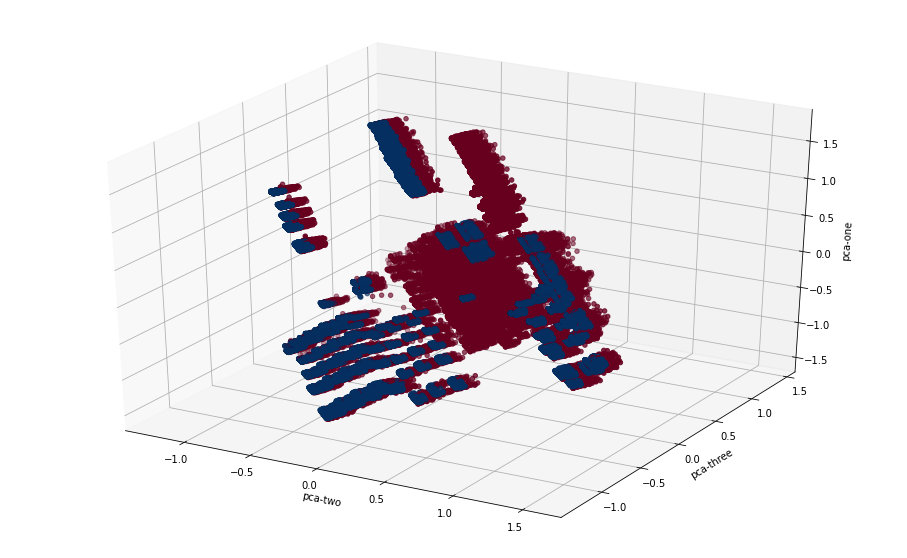

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 549.2652952671051 seconds


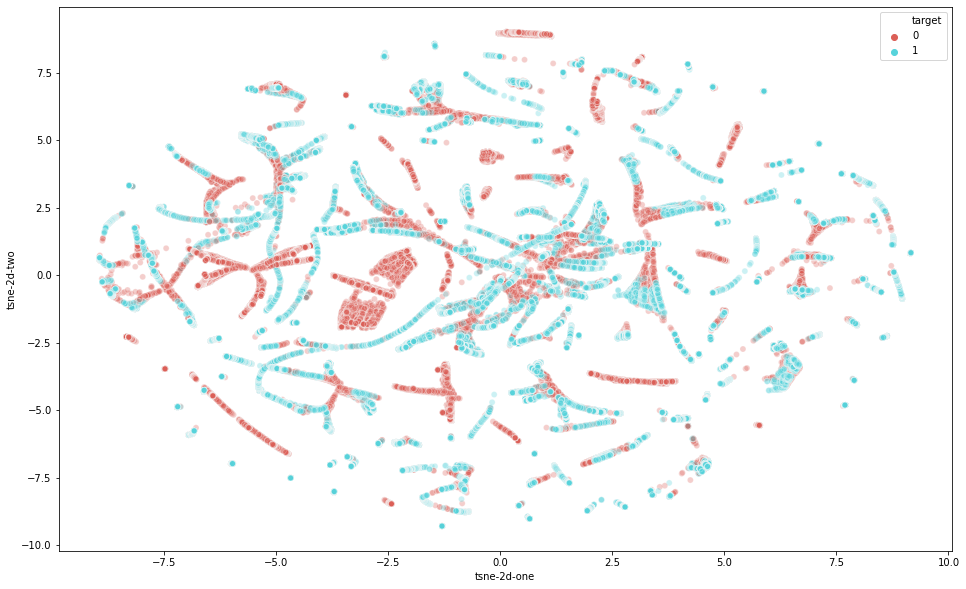

In [ ]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

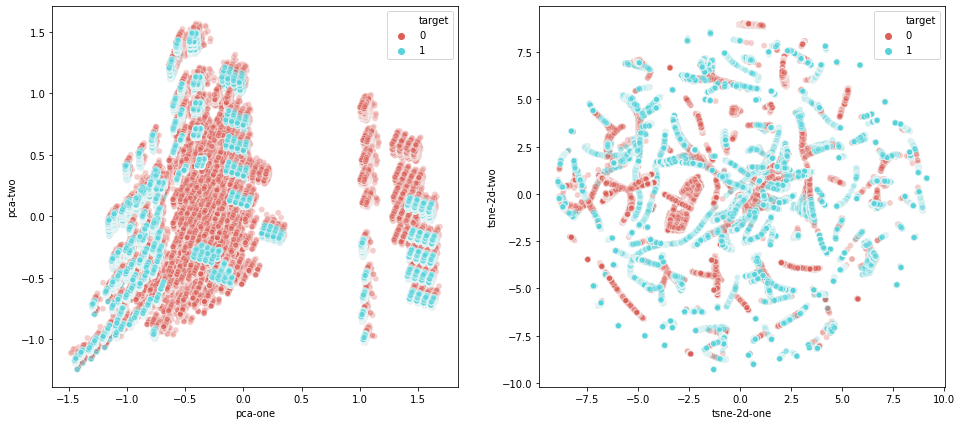

In [ ]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 449.93573236465454 seconds


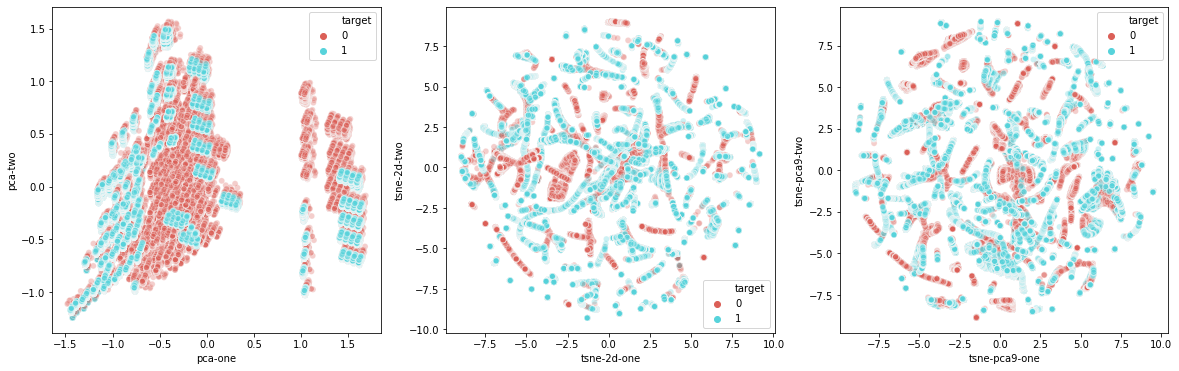

In [ ]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [ ]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [ ]:
train_Y = df['target']
train_Y.value_counts()

0    71826
1    50101
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [ ]:
seed = 5
np.random.seed(seed)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                 Specs        Score
19          port_index  7017.092546
16    max_packet_count  4393.967826
1               inport  4105.160582
14   packet_count_decr  2202.456343
15   packet_count_incr  2191.516857
17  packet_count_index  2183.308289
0              outport  1715.431277
18    packet_max_index  1514.481135
6                   vc   257.290771
9         traversal_id   217.085244
24       vnet_vc_index   184.368527
10           hop_count   179.517812
5                 vnet   171.406556
7               dst_ni   146.439675
8           dst_router    97.809212
22     traversal_index    67.815081
25    vnet_vc_cc_index    58.040118


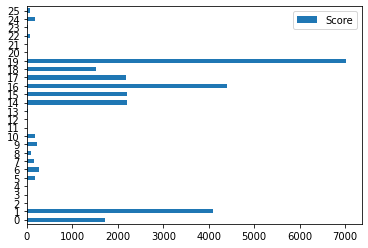

In [ ]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.443209
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                                     Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.346      
Dependent Variable:         target                  AIC:                     108124.2640
Date:                       2020-05-08 09:15        BIC:                     108347.6211
No. Observations:           121927                  Log-Likelihood:          -54039.    
Df Model:                   22                      LL-Null:                 -82567.    
Df Residuals:               121904                  LLR p-value:             0.0000     
Converged:                  0.0000                  Scale:                   1.0000     
No. Iterations:             35.0000                                                     
----------------------------------------------------------------------------------------
                            Coef.     Std.Err.     z     P>|z|     [0.025       0.975]  
----------------------------------------------------------

In [ ]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 80.48205370049519
Test Prediction  80.57081932256213


In [60]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
24,vnet_vc_index,11.441037
7,dst_ni,10.679822
17,packet_count_index,8.360187
20,cache_coherence_flit_index,6.347908
4,flit_type,4.598006
1,inport,3.754142
23,cache_coherence_vnet_index,2.772719
0,outport,2.732643
2,cache_coherence_type,2.713176
13,enqueue_time,1.959918


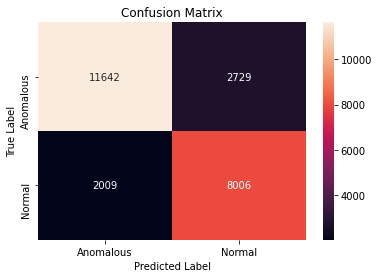

In [61]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83     14371
           1       0.75      0.80      0.77     10015

    accuracy                           0.81     24386
   macro avg       0.80      0.80      0.80     24386
weighted avg       0.81      0.81      0.81     24386



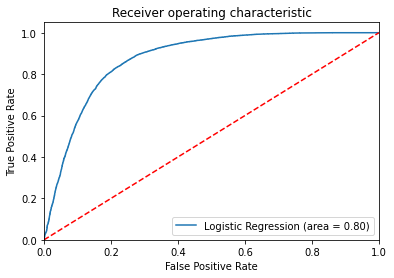

In [63]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [64]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn= knn.predict(X_test)

In [66]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 90.78233768364072
Test Prediction  87.33289592389075


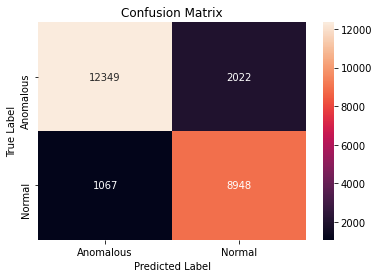

In [67]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [68]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     14371
           1       0.82      0.89      0.85     10015

    accuracy                           0.87     24386
   macro avg       0.87      0.88      0.87     24386
weighted avg       0.88      0.87      0.87     24386



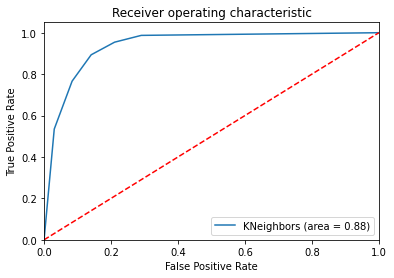

In [69]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [ ]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [71]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb= nb.predict(X_test)

In [73]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 71.13931577490492
Test Prediction Score 71.40572459607972


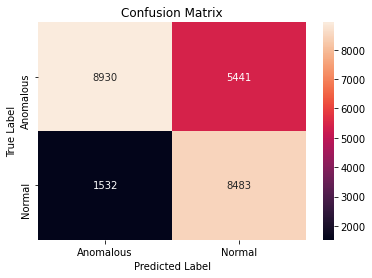

In [74]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [75]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      0.62      0.72     14371
           1       0.61      0.85      0.71     10015

    accuracy                           0.71     24386
   macro avg       0.73      0.73      0.71     24386
weighted avg       0.75      0.71      0.71     24386



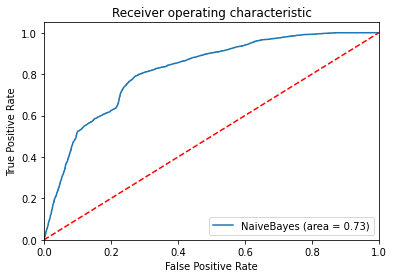

In [76]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [ ]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [78]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 78032 samples, validate on 19509 samples
Epoch 1/10
78032/78032 [==============================] - 3s 36us/step - loss: 0.1771 - accuracy: 0.7379 - val_loss: 0.1494 - val_accuracy: 0.7969
Epoch 2/10
78032/78032 [==============================] - 3s 33us/step - loss: 0.1499 - accuracy: 0.7959 - val_loss: 0.1478 - val_accuracy: 0.7947
Epoch 3/10
78032/78032 [==============================] - 3s 34us/step - loss: 0.1487 - accuracy: 0.7949 - val_loss: 0.1468 - val_accuracy: 0.7933
Epoch 4/10
78032/78032 [==============================] - 3s 35us/step - loss: 0.1480 - accuracy: 0.7953 - val_loss: 0.1465 - val_accuracy: 0.7925
Epoch 5/10
78032/78032 [==============================] - 3s 34us/step - loss: 0.1475 - accuracy: 0.7961 - val_loss: 0.1457 - val_accuracy: 0.7954
Epoch 6/10
78032/78032 [==============================] - 3s 34us/step - loss: 0.1472 - accuracy: 0.7961 - val_loss: 0.1453 - val_accuracy: 0.7953
Epoch 7/10
78032/78032 [==============================] - 3s 34us/st

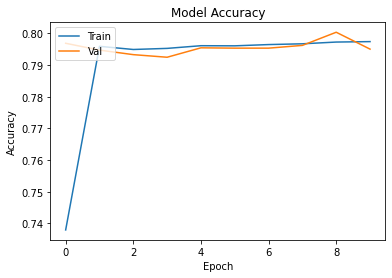

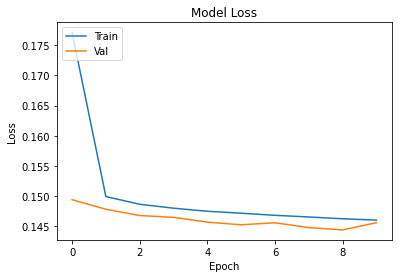

In [79]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [80]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.74%


3-Layer Neural Network

In [83]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 78032 samples, validate on 19509 samples
Epoch 1/15
78032/78032 [==============================] - 3s 36us/step - loss: 0.2441 - accuracy: 0.5793 - val_loss: 0.2424 - val_accuracy: 0.5886
Epoch 2/15
78032/78032 [==============================] - 3s 34us/step - loss: 0.2422 - accuracy: 0.5891 - val_loss: 0.2421 - val_accuracy: 0.5886
Epoch 3/15
78032/78032 [==============================] - 3s 33us/step - loss: 0.2420 - accuracy: 0.5891 - val_loss: 0.2419 - val_accuracy: 0.5886
Epoch 4/15
78032/78032 [==============================] - 3s 36us/step - loss: 0.2416 - accuracy: 0.5891 - val_loss: 0.2413 - val_accuracy: 0.5886
Epoch 5/15
78032/78032 [==============================] - 3s 34us/step - loss: 0.2393 - accuracy: 0.5892 - val_loss: 0.2345 - val_accuracy: 0.6008
Epoch 6/15
78032/78032 [==============================] - 3s 33us/step - loss: 0.2210 - accuracy: 0.6545 - val_loss: 0.2067 - val_accuracy: 0.6940
Epoch 7/15
78032/78032 [==============================] - 3s 33us/st

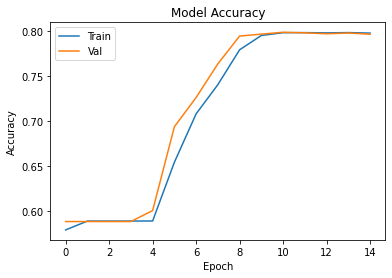

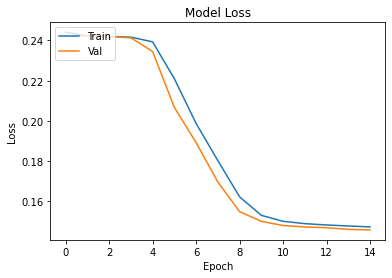

In [84]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [85]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.00%


4-Layer Neural Network



In [86]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 78032 samples, validate on 19509 samples
Epoch 1/30
78032/78032 [==============================] - 3s 35us/step - loss: 0.2434 - accuracy: 0.5891 - val_loss: 0.2420 - val_accuracy: 0.5886
Epoch 2/30
78032/78032 [==============================] - 3s 34us/step - loss: 0.2418 - accuracy: 0.5891 - val_loss: 0.2417 - val_accuracy: 0.5886
Epoch 3/30
78032/78032 [==============================] - 3s 35us/step - loss: 0.2414 - accuracy: 0.5891 - val_loss: 0.2411 - val_accuracy: 0.5886
Epoch 4/30
78032/78032 [==============================] - 3s 36us/step - loss: 0.2406 - accuracy: 0.5891 - val_loss: 0.2401 - val_accuracy: 0.5886
Epoch 5/30
78032/78032 [==============================] - 3s 35us/step - loss: 0.2389 - accuracy: 0.5891 - val_loss: 0.2370 - val_accuracy: 0.5886
Epoch 6/30
78032/78032 [==============================] - 3s 36us/step - loss: 0.2294 - accuracy: 0.5891 - val_loss: 0.2139 - val_accuracy: 0.5886
Epoch 7/30
78032/78032 [==============================] - 3s 36us/st

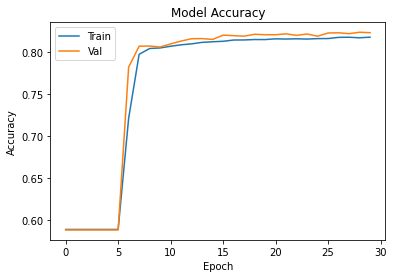

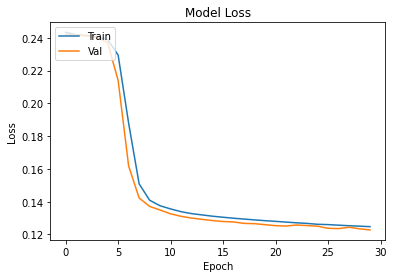

In [87]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [88]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.11%


5-Layer Neural Network Optimized

In [98]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 78032 samples, validate on 19509 samples
Epoch 1/100
78032/78032 [==============================] - 6s 73us/step - loss: 0.1303 - accuracy: 0.8096 - val_loss: 0.1168 - val_accuracy: 0.8288
Epoch 2/100
78032/78032 [==============================] - 5s 65us/step - loss: 0.1194 - accuracy: 0.8248 - val_loss: 0.1115 - val_accuracy: 0.8355
Epoch 3/100
78032/78032 [==============================] - 5s 63us/step - loss: 0.1165 - accuracy: 0.8298 - val_loss: 0.1082 - val_accuracy: 0.8383
Epoch 4/100
78032/78032 [==============================] - 5s 63us/step - loss: 0.1142 - accuracy: 0.8348 - val_loss: 0.1059 - val_accuracy: 0.8468
Epoch 5/100
78032/78032 [==============================] - 5s 63us/step - loss: 0.1131 - accuracy: 0.8362 - val_loss: 0.1156 - val_accuracy: 0.8279
Epoch 6/100
78032/78032 [==============================] - 5s 64us/step - loss: 0.1120 - accuracy: 0.8384 - val_loss: 0.1041 - val_accuracy: 0.8495
Epoch 7/100
78032/78032 [==============================] - 5s 

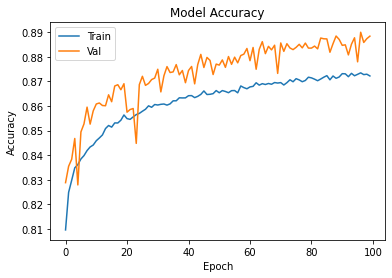

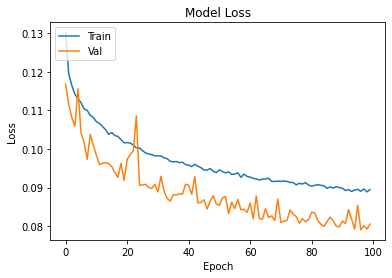

In [103]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [104]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 88.81%


Decision Tree Classifier

In [ ]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [108]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.9315262089598747


In [115]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred_dt= dt.predict(X_test)

In [117]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 99.13779846423554
Test Prediction Score 95.66144509144591


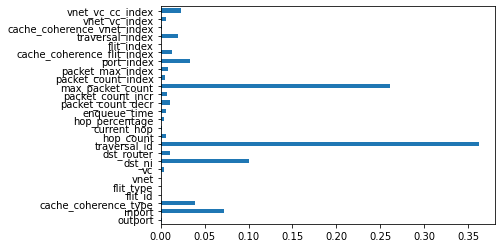

In [118]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

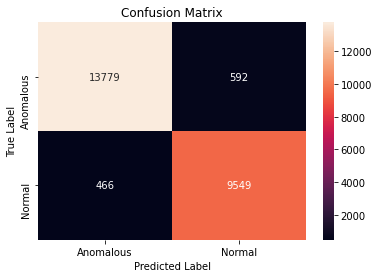

In [119]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [120]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     14371
           1       0.94      0.95      0.95     10015

    accuracy                           0.96     24386
   macro avg       0.95      0.96      0.96     24386
weighted avg       0.96      0.96      0.96     24386



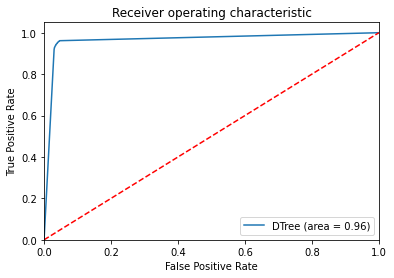

In [121]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [ ]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250],
            'max_features':range(0,25,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [123]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf= rf.predict(X_test)

In [125]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.74267231215592
Test Prediction Score 95.88698433527433


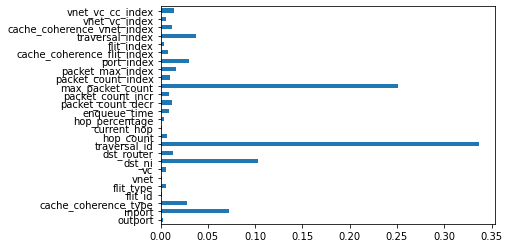

In [126]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

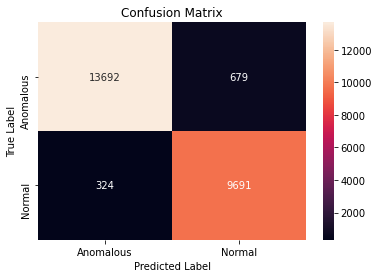

In [127]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [128]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     14371
           1       0.93      0.97      0.95     10015

    accuracy                           0.96     24386
   macro avg       0.96      0.96      0.96     24386
weighted avg       0.96      0.96      0.96     24386



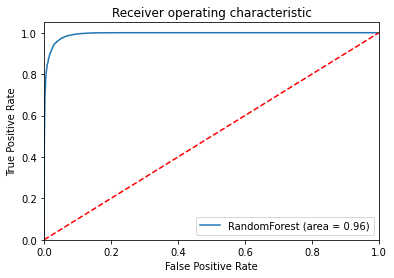

In [129]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [ ]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250,500],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

In [131]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_xgbc= xgbc.predict(X_test)

In [133]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.89440337909187
Test Prediction Score 97.86762896744034


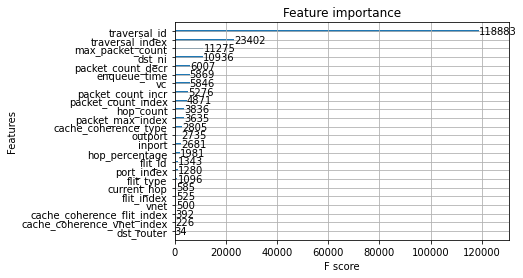

In [134]:
plot_importance(xgbc)
plt.show()

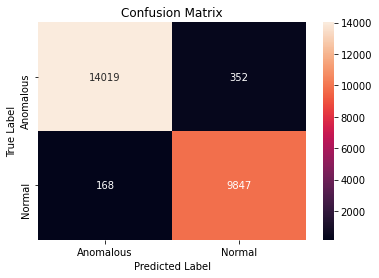

In [135]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [136]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14371
           1       0.97      0.98      0.97     10015

    accuracy                           0.98     24386
   macro avg       0.98      0.98      0.98     24386
weighted avg       0.98      0.98      0.98     24386



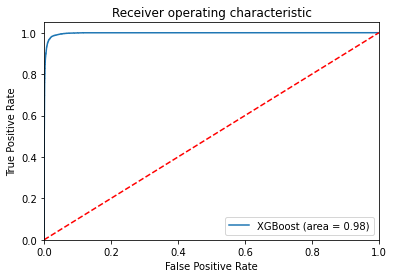

In [137]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [ ]:
#lightgbm
import lightgbm as lgb

In [ ]:
# GridSearchCV
param_grid = {'n_estimators': [x for x in range(24,40,2)],
              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
lgb_cv.fit(X_train, y_train)

print("Best parameters:",lgb_cv.best_params_)
print("Accuracy :",lgb_cv.best_score_)

Best parameters: {'learning_rate': 0.2, 'n_estimators': 38}
Accuracy : 0.9121924746743849


In [ ]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
y_pred_gbm= gbm.predict(X_test)

In [ ]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 96.03232030873131
Test Prediction Score 93.42165957664908


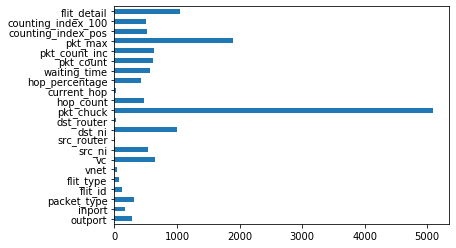

In [ ]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

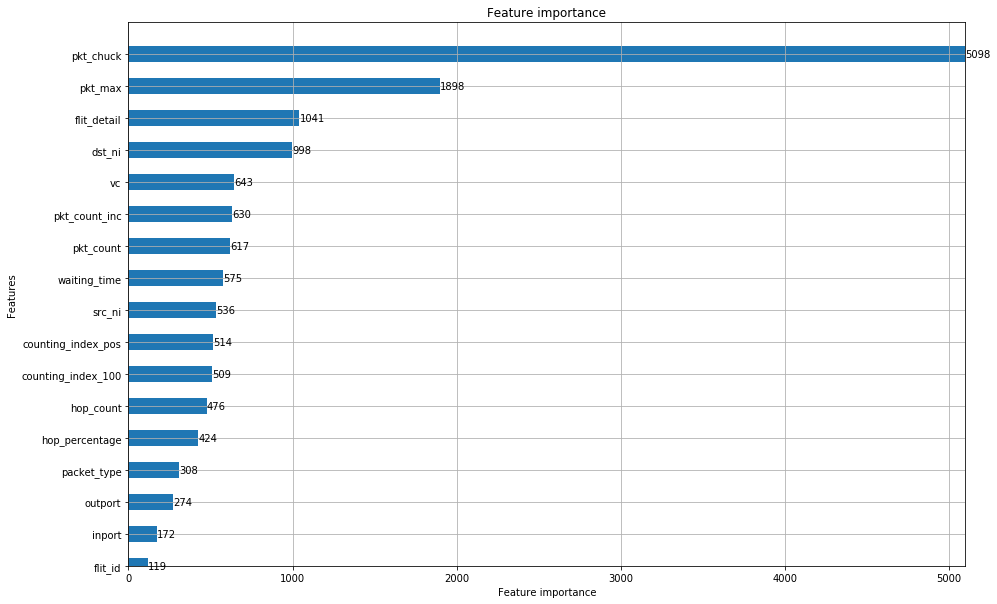

In [ ]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,5100), ylim = (0,17), figsize = (15,10))
plt.show()

In [ ]:
sorted(gbm.feature_importances_,reverse=True)

[5098,
 1898,
 1041,
 998,
 643,
 630,
 617,
 575,
 536,
 514,
 509,
 476,
 424,
 308,
 274,
 172,
 119,
 68,
 44,
 23,
 20,
 13]

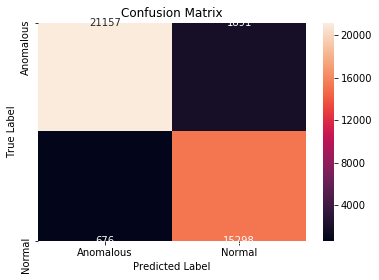

In [ ]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     23048
           1       0.89      0.96      0.92     15974

    accuracy                           0.93     39022
   macro avg       0.93      0.94      0.93     39022
weighted avg       0.94      0.93      0.93     39022



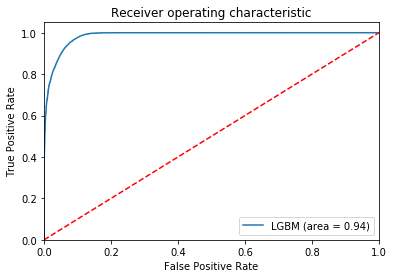

In [ ]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()